In [1]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

2025-06-01 13:26:21.351100: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-01 13:26:21.351430: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-01 13:26:21.354006: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-01 13:26:21.360564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748764581.373232  207827 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748764581.37

In [2]:
# Load MNIST data
(X_train, Y_train),(X_test, Y_test) = load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
# Reshape data to include channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [6]:
# Normalization - normalize the values of pixel of images
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

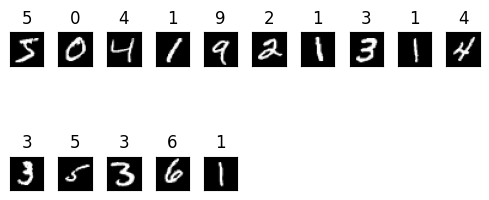

In [7]:
fig = plt.figure(figsize=(5, 3))
for i in range(15):
    ax = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]), cmap='gray')
    ax.set_title(Y_train[i])
plt.tight_layout()
plt.show()

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
inp_shape = X_train.shape[1:]

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=inp_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2025-06-01 13:26:23.531499: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       600,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,702 (2.36 MB)

 Trainable params: 619,702 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

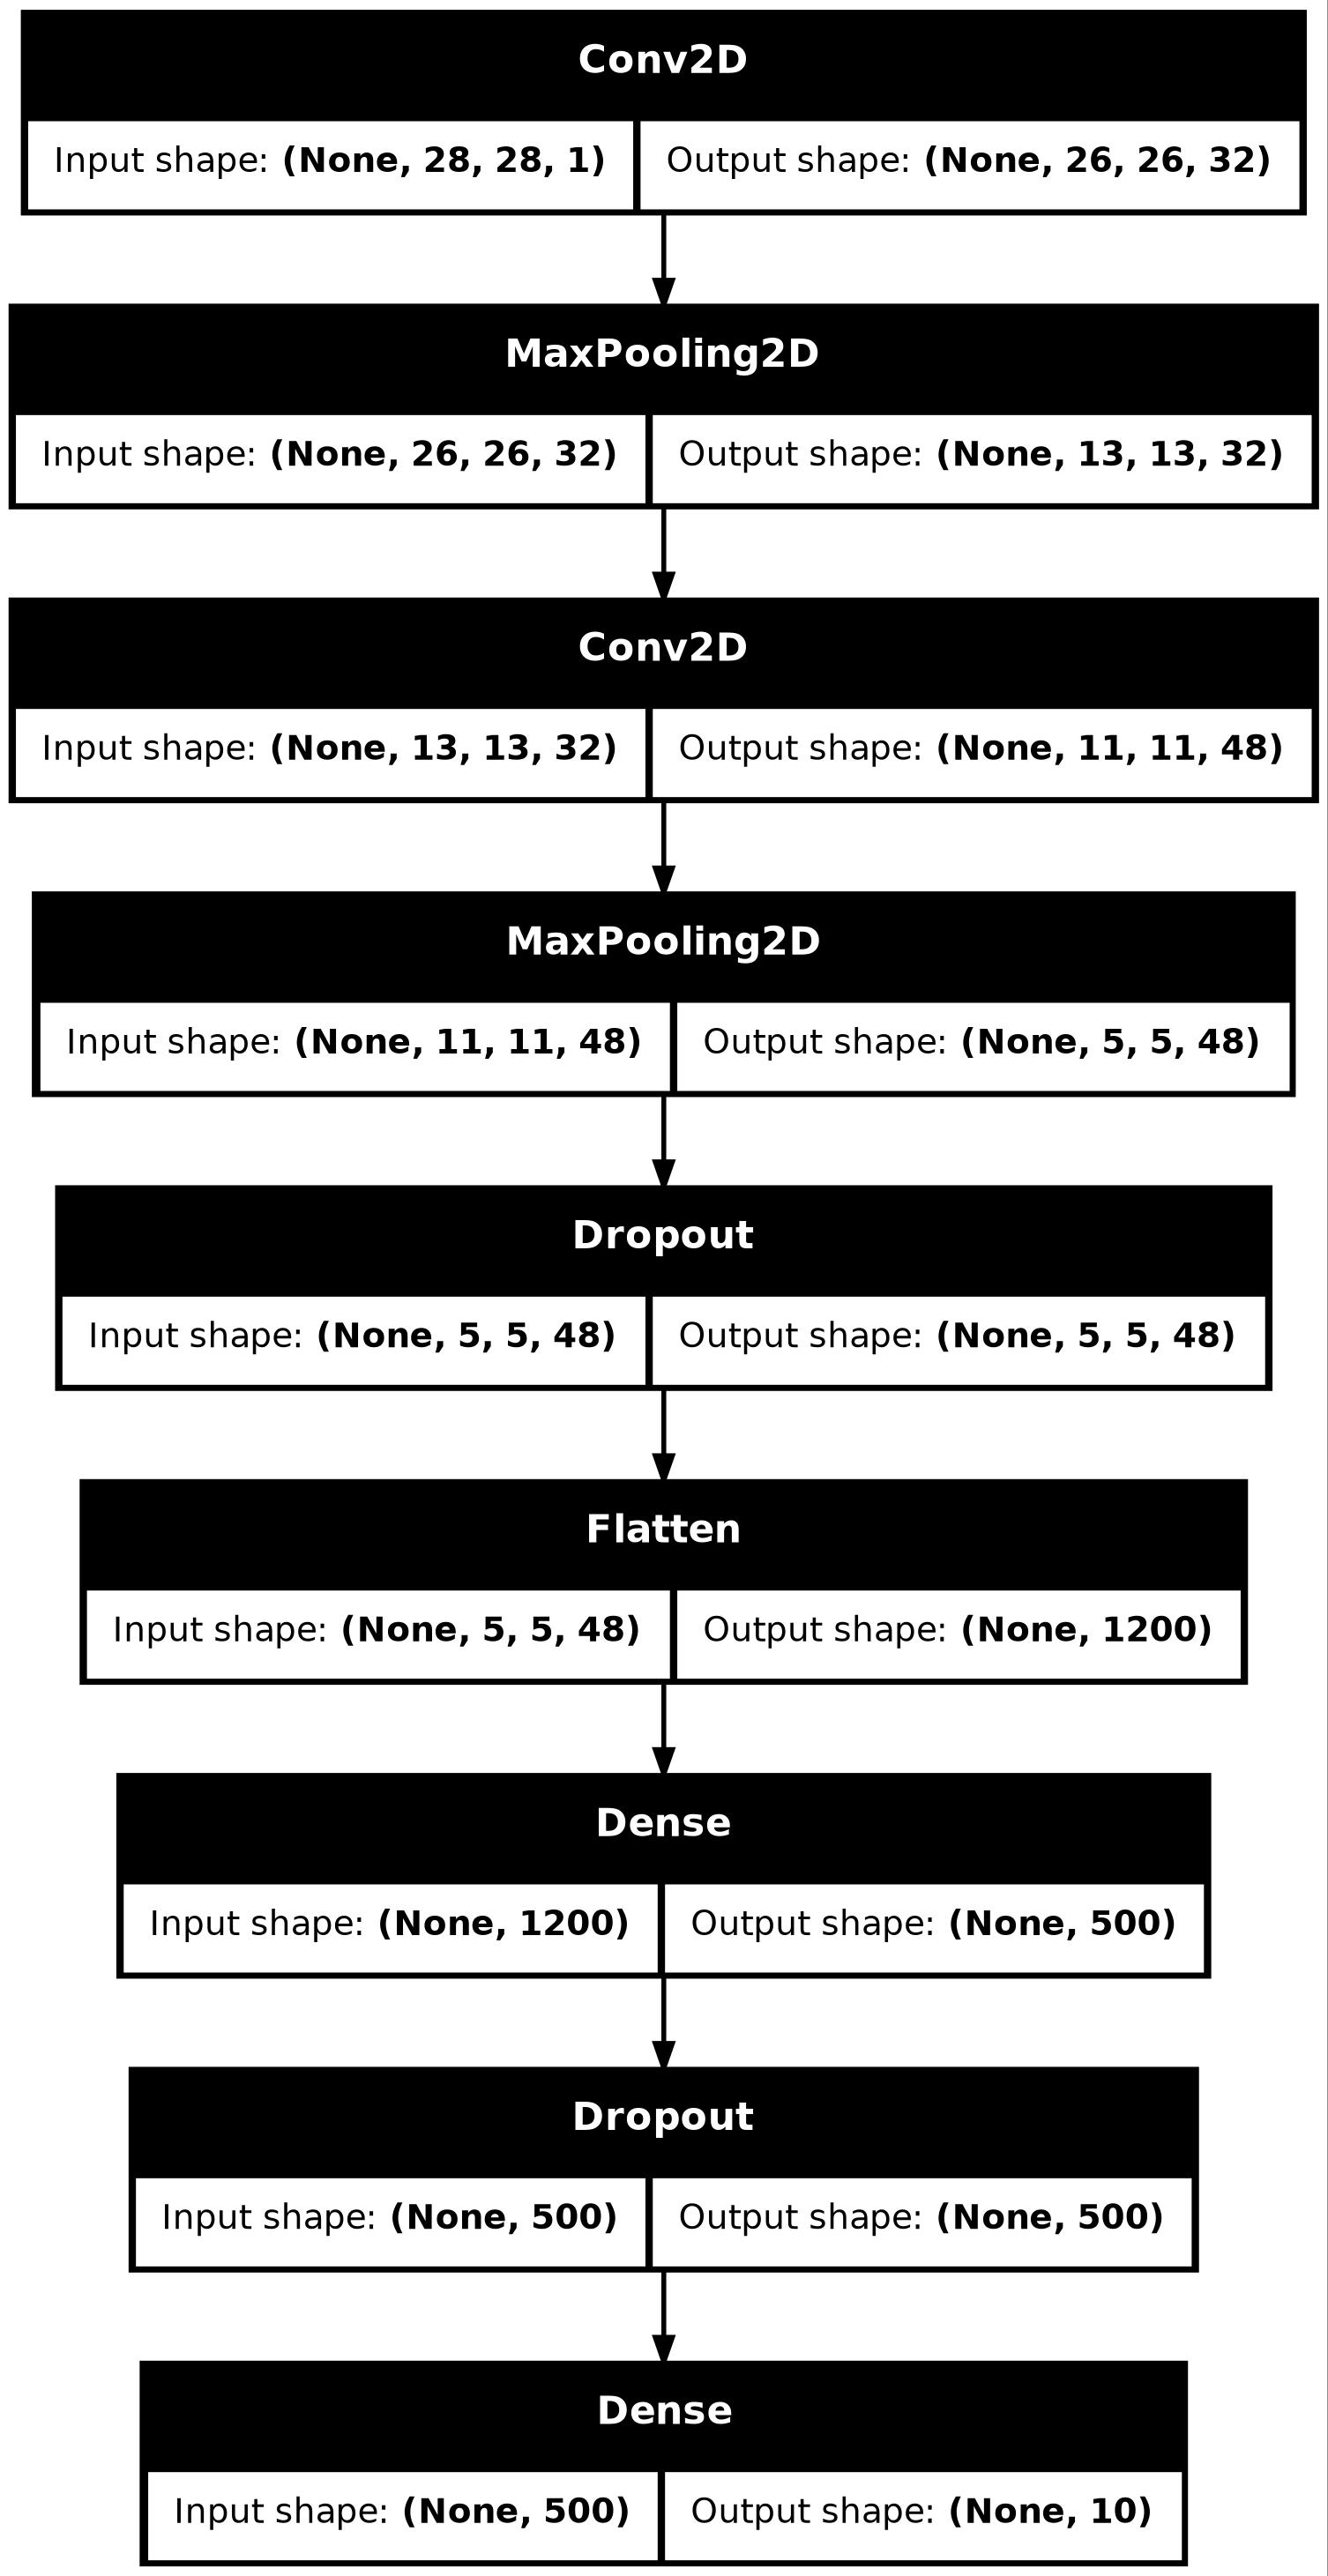

In [12]:
plot_model(model, 'cnn_model.jpg', show_shapes=True)

In [13]:
# training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 8s - 19ms/step - accuracy: 0.9049 - loss: 0.2979 - val_accuracy: 0.9825 - val_loss: 0.0582
Epoch 2/10
422/422 - 7s - 18ms/step - accuracy: 0.9685 - loss: 0.0990 - val_accuracy: 0.9882 - val_loss: 0.0406
Epoch 3/10
422/422 - 7s - 17ms/step - accuracy: 0.9752 - loss: 0.0771 - val_accuracy: 0.9897 - val_loss: 0.0365
Epoch 4/10
422/422 - 7s - 18ms/step - accuracy: 0.9796 - loss: 0.0644 - val_accuracy: 0.9887 - val_loss: 0.0371
Epoch 5/10
422/422 - 8s - 18ms/step - accuracy: 0.9818 - loss: 0.0569 - val_accuracy: 0.9920 - val_loss: 0.0298
Epoch 6/10
422/422 - 8s - 20ms/step - accuracy: 0.9836 - loss: 0.0519 - val_accuracy: 0.9912 - val_loss: 0.0306
Epoch 7/10
422/422 - 8s - 20ms/step - accuracy: 0.9854 - loss: 0.0461 - val_accuracy: 0.9932 - val_loss: 0.0279
Epoch 8/10
422/422 - 9s - 22ms/step - accuracy: 0.9864 - loss: 0.0428 - val_accuracy: 0.9933 - val_loss: 0.0242
Epoch 9/10
422/422 - 9s - 21ms/step - accuracy: 0.9878 - loss: 0.0385 - val_accuracy: 0.9928 - val_loss:

In [14]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0295

Test accuracy: {test_acc:.4f}


In [15]:
print(f'\nTest accuracy: {test_acc:.4f}')


Test accuracy: 0.9924
